<a href="https://colab.research.google.com/github/joshiayush/ai/blob/master/ai/projects/machine-learning/algorithms/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Nearest Neighbours

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [6]:
_MAGIC_DATASET_PATH = 'magic04.data'

We need to explicitly define names since the dataset does not come with a column field.

In [7]:
df = pd.read_csv(
    _MAGIC_DATASET_PATH,
    names=[
        "fLength",
        "fWidth",
        "fSize",
        "fConc",
        "fConc1",
        "fAsym",
        "fM3Long",
        "fM3Trans",
        "fAlpha",
        "fDist",
        "class",
    ],
)

In [8]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [9]:
df['class'].unique()

array(['g', 'h'], dtype=object)

Since, the class labels only contains letters and we need numerical data to establish a mapping from our independent variables to our dependent variables - we need to convert the classes into numerical data.

In [10]:
df['class'] = (df['class'] == 'g').astype(int)

Now we're all set with our labels.

In [11]:
df['class'].unique()

array([1, 0])

Let's plot histograms of our labels.

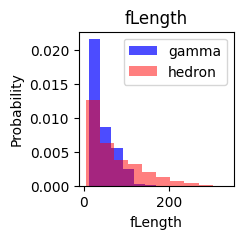

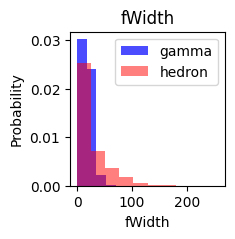

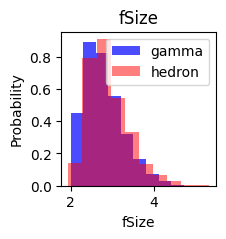

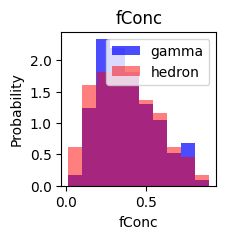

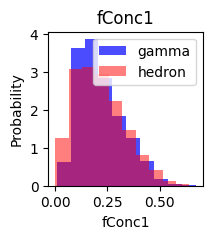

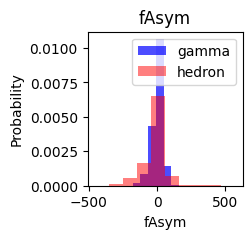

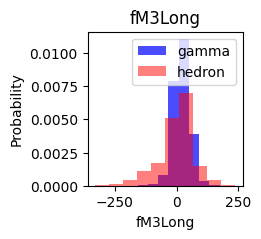

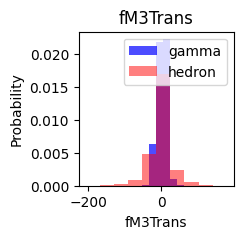

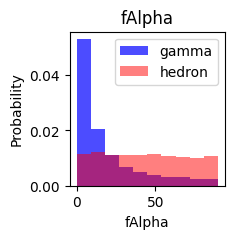

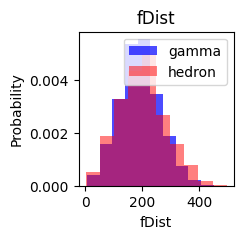

In [17]:
for label in df.columns[:-1]:
    plt.figure(figsize=(2, 2))
    plt.hist(
        df[df["class"] == 1][label],
        color="blue",
        label="gamma",
        alpha=0.7,
        density=True,
    )
    plt.hist(
        df[df["class"] == 0][label],
        color="red",
        label="hedron",
        alpha=0.5,
        density=True,
    )
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

## Train, Validation, and Test Split

In [53]:
train, valid, test = np.split(
    df.sample(frac=1, random_state=42), [int(0.7 * len(df)), int(0.83 * len(df))]
)

Let's rebalance our training set so that the proportion of `alpha` and `hedron` particles remain same.

In [54]:
def ScaleDataset(df, over_sample=False):
    X = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if over_sample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

In [55]:
train, X_train, y_train = ScaleDataset(train, over_sample=True)

In [56]:
valid, X_valid, y_valid = ScaleDataset(valid)

In [57]:
test, X_test, y_test = ScaleDataset(test)

In [58]:
sum(y_train == 1), sum(y_train == 0)

(8650, 8650)

## Training our model

In [75]:
model = KNeighborsClassifier(n_neighbors=25)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

Making predictions from our trained model.

In [76]:
y_pred = model.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1126
           1       0.85      0.90      0.88      2108

    accuracy                           0.83      3234
   macro avg       0.82      0.81      0.81      3234
weighted avg       0.83      0.83      0.83      3234

